<h1>Linear Regression</h1>
<p>Insurance cost prediction.</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the dataset
df = pd.read_csv('Datasets/insuranceLR.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<h2>EDA</h2>

In [9]:
print(df.shape)
df.info()

(1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

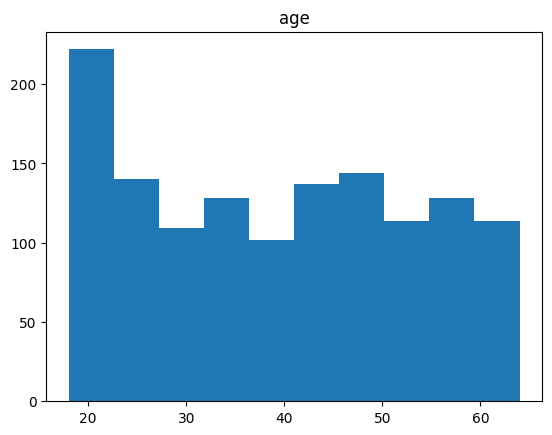

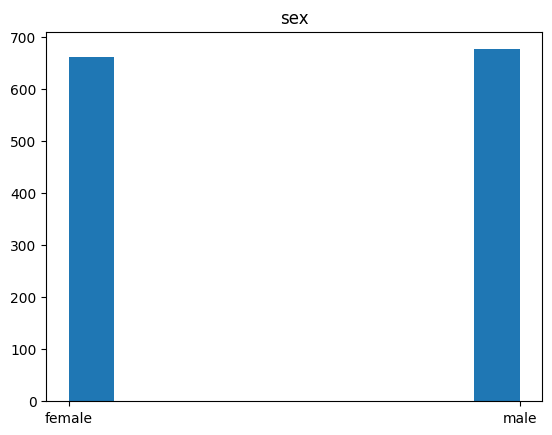

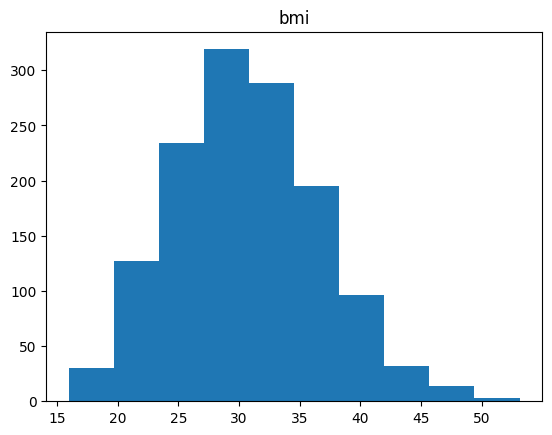

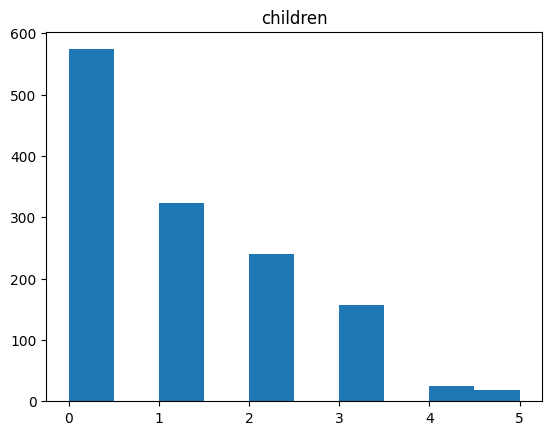

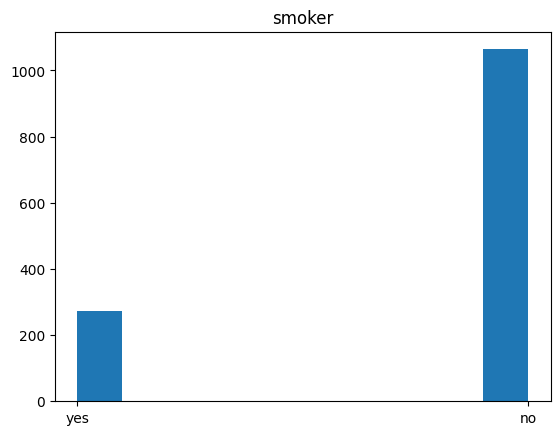

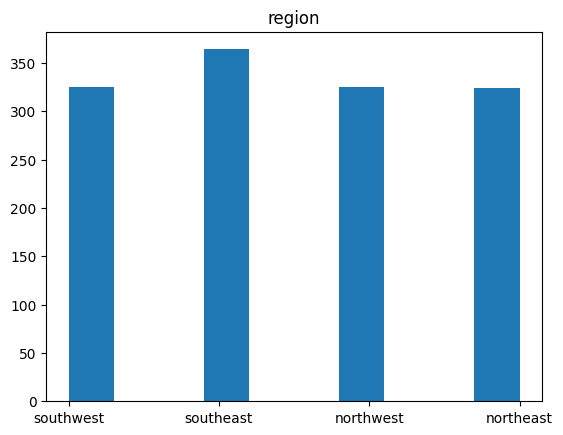

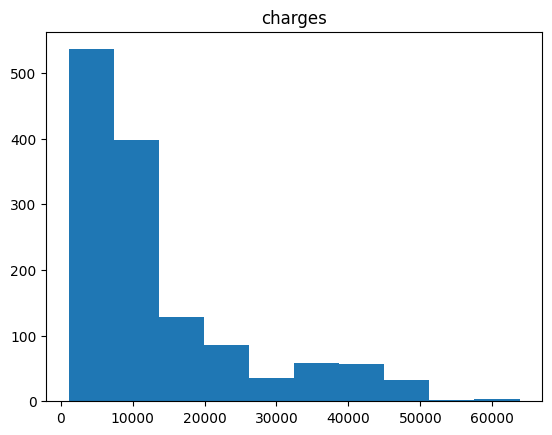

In [24]:
for x in df.columns:
    plt.title(x)
    plt.hist(df[x])
    plt.show()

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [4]:
#changing categorical variables male and female
label = LabelEncoder()
x = label.fit_transform(df['sex'])
encoder = OneHotEncoder()
result = encoder.fit_transform(x.reshape(-1,1)).toarray()
df[['femaleh', 'maleh']] = result

In [5]:
#changing categorical variables smoker and not smoker
label = LabelEncoder()
x = label.fit_transform(df['smoker'])
encoder = OneHotEncoder()
result = encoder.fit_transform(x.reshape(-1,1)).toarray()
result
df[['not_smoker', 'yes_smoker']] = result

In [8]:
#Region categorical variables 'northeast1' ,'northwest1','southeast1', 'southwest1'
label = LabelEncoder()
x = label.fit_transform(df['region'])
encoder = OneHotEncoder()
result = encoder.fit_transform(x.reshape(-1,1)).toarray()
result

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [12]:
df[['northeast1' ,'northwest1','southeast1', 'southwest1']] = result

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges,femaleh,maleh,not_smoker,yes_smoker,northeast1,northwest1,southeast1,southwest1
0,19,female,27.900,0,yes,southwest,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


[Text(0.5, 1.0, 'correlation map')]

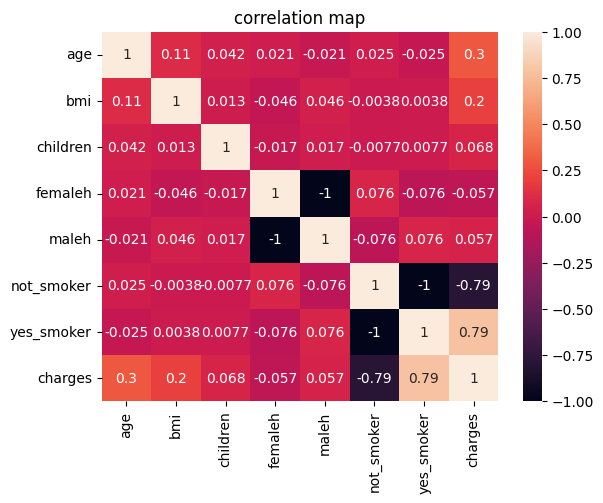

In [7]:
#correlation graph
correlation = df[['age', 'bmi', 'children', 'femaleh', 'maleh', 'not_smoker', 'yes_smoker', 'charges']].corr()
sns.heatmap(correlation, annot=True).set(title='correlation map')

In [15]:
df.to_csv('Datasets/insuranceLR_transformed.csv', index=False)

<h2>Machine learning model</h2>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X = df[['age', 'bmi', 'children', 'femaleh', 'maleh', 'not_smoker', 'yes_smoker', 'northeast1' ,'northwest1','southeast1', 'southwest1']]
y = df['charges']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1070, 11) (268, 11) (1070,) (268,)


In [22]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = linear.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
print(mean_squared_error(y_test, y_pred))
r2_score(y_test, y_pred)

33596915.85136146


0.7835929767120723